In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import *
import imageio

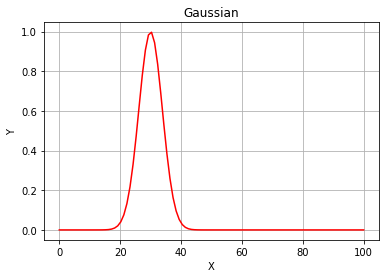

In [2]:
a_x = 0                           ## Limites del espacio-tiempo 
b_x = 100

a_t = 0                         
b_t = 10

v = 20                         ## Velocidad de Propagacion
n = 100                        ## Numero de particiones

def f(s):

     x0 = 30
    
     x = np.zeros(n) 
     t = np.zeros(n)
     dx = (b_x-a_x)/(n-1)                ## Malla en el espacio
     dt = (b_t-a_t)/(n-1)                ## Malla en el tiempo


     for i in range(0,n):
         x[i] = a_x + dx*i                     ## Posicion sobre la malla
         t[i] = a_t + dt*i                     ## Tiempo       
     f = np.exp(-(x-x0)**2/(2*s))
     return x,f,t

plt.grid()                                       ## Perfil Inicial
plt.title('Gaussian')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(f(15)[0],f(15)[1],'r')

In [3]:
def g(f):                            ## Metodo FCTS                    ## j: Time    i: Position
    
   u = np.zeros((n,n))                 ## Propagacion   
   dx = (b_x-a_x)/(n-1)                ## Malla en el espacio
   dt = (b_t-a_t)/(n-1)                ## Malla en el tiempo
                       ## Error
   
   u[:,0] = f
                         ## Valor Maximo de la funcion
   for j in range(0,n-1):         ## Columna                            
       for i in range(1,n-1):                ## Espacio
            
           u[i][j+1] = (u[i][j]) - (v/2)*(dt/dx)*(u[i+1][j] - u[i-1][j])
   return u    

In [4]:
def h(f):                            ## Metodo Upwind
    
   u = np.zeros((n,n))                 ## Propagacion   
   dx = (b_x-a_x)/(n-1)                ## Malla en el espacio
   dt = (b_t-a_t)/(n-1)                ## Malla en el tiempo

   u[:,0] = f
                         ## Valor Maximo de la funcion
   for j in range(0,n-1):         ## Columna                            
       for i in range(1,n-1):                ## Espacio
            
           u[i][j+1] = (u[i][j]) - (v/2)*(dt/dx)*(u[i][j] - u[i-1][j])
   return u   

In [5]:
def e(f,u):                     ## Error entre frentes      n:## particiones  f: Perfil Inicial   u: Comparacion error
    e = np.zeros(n)
    e[0] = max(f) 
    for j in range(1,n):
       e[j] = abs((e[0] - max(u[:,j]))*100/e[0])
    return e 

In [6]:
def gif(x,u,s):  ## Estoy generando las n imagenes para el gif  
    
    filenames = []        ## x:Posicion   u: Posicion en el tiempo   s: # Imagenes  r: Perfil inicial  
    for i in range(0,s):
        
        plt.xlabel('Position')
        plt.ylabel('Function')
        plt.plot(x,u[:,i], label = 't =' + str(i))
        plt.legend((['t =' +str(round((f(s)[2])[i],3))+ 's'+'    E='+str(round(e(f(s)[1],u)[i],3))+'%']),prop = {'size':10}, loc = 'lower center')
        plt.savefig(str(i)+'.png')
        filenames += [str(i)+'.png']
        
    images = []                     ## Estoy uniendo las imagenes para el gif 

    for filename in filenames:
        images.append(imageio.imread(str(filename)))
    imageio.mimsave('movie.gif',images,duration = 0.5)

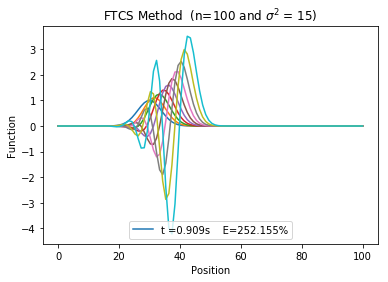

In [7]:
plt.title('FTCS Method  (n=100 and $\sigma^2$ = 15)',)        
gif(f(15)[0],g(f(15)[1]),10)

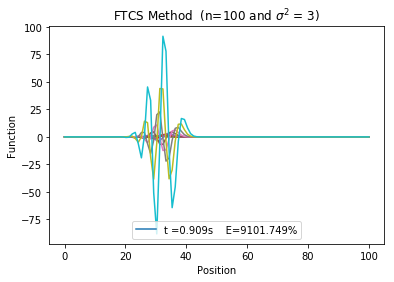

In [41]:

plt.title('FTCS Method  (n=100 and $\sigma^2$ = 3)',)        
gif(f(3)[0],g(f(3)[1]),10)

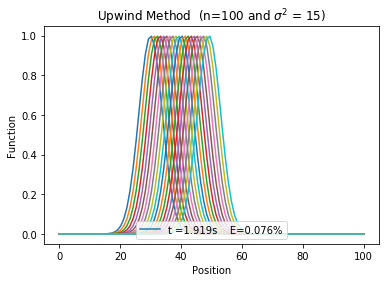

In [8]:
plt.title('Upwind Method  (n=100 and $\sigma^2$ = 15)')      
gif(f(15)[0],h(f(15)[1]),20)

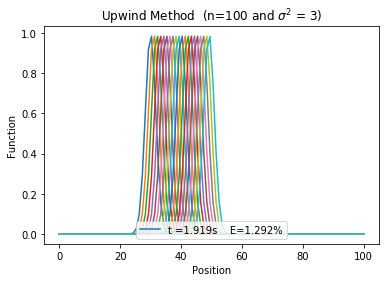

In [43]:
plt.title('Upwind Method  (n=100 and $\sigma^2$ = 3)')      
gif(f(3)[0],h(f(3)[1]),20)